<a href="https://colab.research.google.com/github/johyunkang/ADP_certificate_preperation/blob/main/stat_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pulp==2.5.0

### 27회. 지하철 호선과 월별 승객 수 간 상관관계가 있는지 확인 (Type3 ANOVA 상요)


- 1. 귀무가설과 대립가설을 설정하라

In [ ]:
print('''
1. 상호작용효과 검정에 대한 가설
- 귀무가설(H0): 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설(H1): 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

2. 주효과 검정에 대한 가설(2개)
 - 귀무가설(H0): 지하철 호선과 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 자하철 호선과 승객 수 차이는 존재한다.
 
 - 귀무가설(H0): 월별 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 월별 승객 수 차이는 존재한다.
''')


1. 상호작용효과 검정에 대한 가설
- 귀무가설(H0): 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설(H1): 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

2. 주효과 검정에 대한 가설(2개)
 - 귀무가설(H0): 지하철 호선과 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 자하철 호선과 승객 수 차이는 존재한다.
 
 - 귀무가설(H0): 월별 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 월별 승객 수 차이는 존재한다.



- 2. 통계량을 구하고, 대립가설 채택 여부를 기술하라

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import numpy as np

DATA_URL = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/'
df = pd.read_csv(DATA_URL+'27_problem9.csv')
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [ ]:
formula = 'total ~ C(line)*C(month)'
model = ols(formula, data=df).fit()
aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


In [ ]:
print('''
유의수준 0.1 하에서
 - 상호작용효과 검정에 대한 가설은 p-value가 0.1 보다 작기에
   귀무가설을 기각한다. 즉 지하철 호선과 월별, 승객 수 간 상관관계
   가 있다.
   
 - 주효과 검정에 대한 가설 2개는 모두 p-value가 유의수준 0.1 보다
   작기에 귀무가설을 기각한다. 즉, 지하철 호선과 승객 수 차이는
   존재하며, 월별승객 수 차이 또한 존재한다.
   
교호작용을 먼저 검정하는 Type3 ANOVA의 경우 아래 시각화 자료를
통해 상관관계를 한눈에 알 수 있다.
''')


유의수준 0.1 하에서
 - 상호작용효과 검정에 대한 가설은 p-value가 0.1 보다 작기에
   귀무가설을 기각한다. 즉 지하철 호선과 월별, 승객 수 간 상관관계
   가 있다.
   
 - 주효과 검정에 대한 가설 2개는 모두 p-value가 유의수준 0.1 보다
   작기에 귀무가설을 기각한다. 즉, 지하철 호선과 승객 수 차이는
   존재하며, 월별승객 수 차이 또한 존재한다.
   
교호작용을 먼저 검정하는 Type3 ANOVA의 경우 아래 시각화 자료를
통해 상관관계를 한눈에 알 수 있다.



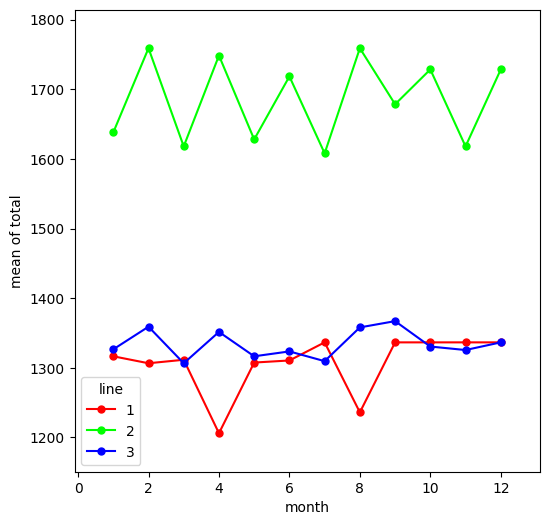

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

total = df['total']
line = df['line']
month = df['month']

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(month, line, total, ms=10, ax=ax)

In [ ]:
print('''
인터랙션 그래프를 보았을 때, month와 line에 따라 승객수의 그래프가
교차하는 지점이 없이 평행해야지 인터랙션이 없다고 할 수 있지만,
해당 그래프에서는 여러 번 교차하므로, 월별 호선이 승객 수에 서로
영향을 준다고 할 수 있다.
즉, 상관관계가 존재한다고 할 수 있다.
''')


인터랙션 그래프를 보았을 때, month와 line에 따라 승객수의 그래프가
교차하는 지점이 없이 평행해야지 인터랙션이 없다고 할 수 있지만,
해당 그래프에서는 여러 번 교차하므로, 월별 호선이 승객 수에 서로
영향을 준다고 할 수 있다.
즉, 상관관계가 존재한다고 할 수 있다.



### 26회. 아래 그래프는 1월부터 9월까지의 은의 가격이다.

- 1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [ ]:
df_silver = pd.DataFrame({'1월':[12.14], '2월':[42.6], '3월':[34.4], '4월':[35.29], 
                         '5월':[30.96], '6월':[57.12], '7월':[37.84], '8월':[42.49], 
                         '9월':[31.38]})
df_silver.index=['value']
df_silver

,1월,2월,3월,4월,5월,6월,7월,8월,9월
value,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [ ]:
df_t = df_silver.T
df_t

,value
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


In [ ]:
df_t['3m'] = df_t.rolling(3).mean()
df_t['3m'] = df_t['3m'].fillna(0)
df_t

,value,3m
1월,12.14,0.000000
2월,42.60,0.000000
3월,34.40,29.713333
4월,35.29,37.430000
5월,30.96,33.550000
6월,57.12,41.123333
7월,37.84,41.973333
8월,42.49,45.816667
9월,31.38,37.236667


In [ ]:
# 폰트 적용 (Windows)
import matplotlib
import matplotlib.font_manager as fm

# # fm.get_fontconfig_fonts()
# font_location='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf'
# font_name=fm.FontProperties(fname=font_location).get_name()
# print(font_name)
# matplotlib.rc('font', family=font_name)

In [ ]:
# 폰트 찾기
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for i, fon in enumerate(font_list):
    # 명조체 찾기
    if 'myun' in fon.lower():
        print(fon)

/System/Library/Fonts/Supplemental/AppleMyungjo.ttf


['AppleMyungjo']


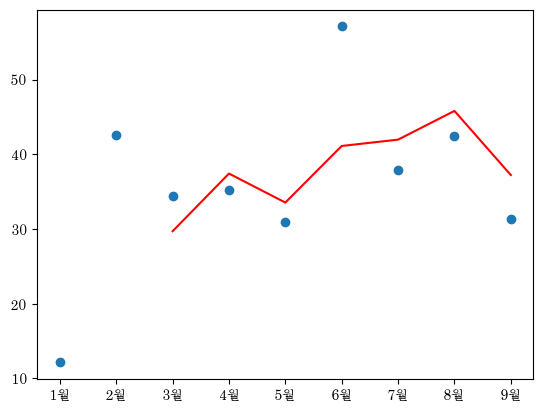

In [ ]:
# 폰트 적용 (mac os)
import matplotlib.pyplot as plt
plt.rc('font', family='AppleMyungjo')

print(plt.rcParams['font.family'])
# plt.plot(df_t['value'])
plt.scatter(df_t['value'].index, df_t['value'])
plt.plot(df_t['3m'][2:], c='red')
plt.show()

- 2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두 번째 자리에서 반올림

In [ ]:
import numpy as np
m1 = df_t.loc['1월', 'value']
m9 = df_t.loc['9월', 'value']
rt = (m9/m1) -1
print(f'1월:{m1}, 9월:{m9}')
print(f'1월 대비 9월 은의 가격은 {round(rt*100, 2)} % 상승하였다.')

1월:12.14, 9월:31.38
1월 대비 9월 은의 가격은 158.48 % 상승하였다.


### 25회.

1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오

In [ ]:
# 문제 주어진 데이터
import pandas as pd
df_npv = pd.DataFrame({'1y':[10, 15, 12, 13, 16],
                      '2y':[20, 14, 11, 25, 30],
                      '3y':[15, 19, 30, 20, 24]})
df_npv.index=['1안', '2안', '3안', '4안', '5안']
df_npv

,1y,2y,3y
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24


In [ ]:
df_npv['total'] = df_npv.sum(axis=1)
df_npv

,1y,2y,3y,total
1안,10,20,15,45
2안,15,14,19,48
3안,12,11,30,53
4안,13,25,20,58
5안,16,30,24,70


In [ ]:
import pulp
import warnings
warnings.filterwarnings(action='ignore')

prob = pulp.LpProblem('Profit Max', pulp.LpMaximize)

a1 = pulp.LpVariable('a1', lowBound=0, upBound=1, cat='Integer')
a2 = pulp.LpVariable('a2', lowBound=0, upBound=1, cat='Integer')
a3 = pulp.LpVariable('a3', lowBound=0, upBound=1, cat='Integer')
a4 = pulp.LpVariable('a4', lowBound=0, upBound=1, cat='Integer')
a5 = pulp.LpVariable('a5', lowBound=0, upBound=1, cat='Integer')

# 목적함수 정의
prob += 45 * a1 + 48 * a2 + 53 * a3 + 58 *a4 + 70 * a5

# 부등식 (제약조건) 정의
prob += 10*a1 + 15*a2 + 12*a3 + 13*a4 + 16*a5 <= 50
prob += 20*a1 + 14*a2 + 11*a3 + 25*a4 + 30*a5 <= 60
prob += 15*a1 + 19*a2 + 30*a3 + 20*a4 + 24*a5 <= 70

# 문제풀기
prob.solve()

# 결과출력
print(f'''
Optimal Solution
a1 = {int(a1.value())}
a2 = {int(a2.value())}
a3 = {int(a3.value())}
a4 = {int(a4.value())}
a5 = {int(a5.value())}
Maximum profilt : {int(prob.objective.value())}
''')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/r7/x_smy14j7xjfkgms9f93wp0r0000gn/T/7c3eb0efc24a48b4bbfc5f73560e1e7d-pulp.mps max branch printingOptions all solution /var/folders/r7/x_smy14j7xjfkgms9f93wp0r0000gn/T/7c3eb0efc24a48b4bbfc5f73560e1e7d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 39 RHS
At line 43 BOUNDS
At line 49 ENDATA
Problem MODEL has 3 rows, 5 columns and 15 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 173.526 - 0.00 seconds
Cgl0004I processed model has 3 rows, 5 columns (5 integer (5 of which binary)) and 15 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.675472
Cbc0038I Pass   1: suminf.    0.10000 (1) obj. -165.7 iterations 1
Cbc0038I Solution found of -118
Cbc0038I Before mini branch 

### 25회

공장 X, Y, Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

- 1. 귀무가설과 연구가설을 제시하시오

In [ ]:
import pandas as pd
df_f= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df_f.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [ ]:
print('''
- 귀무가설(H0): 각 공장의 출하 소요시간 중위수의 차이는 존재하지 않는다.
- 대립가설(H1): 각 공장의 출하 소요시간 중위수의 차이는 존재한다.
''')


- 귀무가설(H0): 각 공장의 출하 소요시간 중위수의 차이는 존재하지 않는다.
- 대립가설(H1): 각 공장의 출하 소요시간 중위수의 차이는 존재한다.



- 2. 검정 후 귀무가설 기각 여부 제시

In [ ]:
from scipy import stats

fac_x = df_f[df_f['공장명']=='X']
fac_y = df_f[df_f['공장명']=='Y']
fac_z = df_f[df_f['공장명']=='Z']
print(fac_x.shape, fac_y.shape, fac_z.shape)

(15, 3) (15, 3) (14, 3)


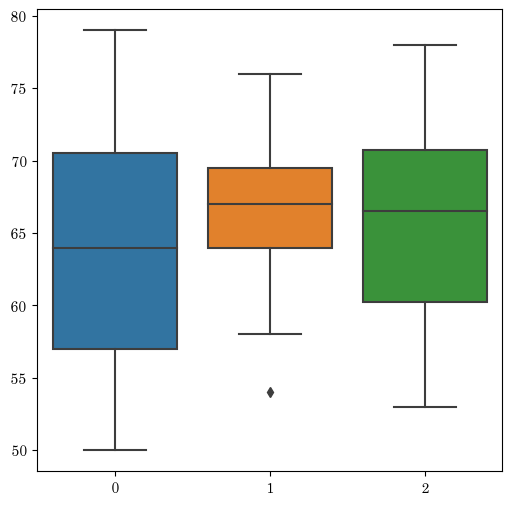

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(6,6))
sns.boxplot([fac_x['출하 소요시간'], fac_y['출하 소요시간'], 
            fac_z['출하 소요시간']])
plt.show()

In [ ]:
fac_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   출하 소요시간         15 non-null     int64 
 1   공장명             15 non-null     object
 2   공장별 출하 소요시간 순위  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes


In [ ]:
st, p_val = stats.kruskal(fac_x['출하 소요시간'],
              fac_y['출하 소요시간'],
              fac_z['출하 소요시간'])

# stats.wilcoxon()

In [ ]:
print(f'''
- 검정통계량:  {st}
- P-VALUE: {p_val}

p-value가 유의수준 0.05보다 크기에 귀무가설이 통계적으로 유의하다.
''')


- 검정통계량:  0.7217886080379153
- P-VALUE: 0.6970526702392181

p-value가 유의수준 0.05보다 크기에 귀무가설이 통계적으로 유의하다.



### 25.
임상 대상 20명에 대한 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9, 신뢰구간 95%, 차이가 존재하는지 확인하려 한다.

- 1. 귀무가설과 연구가설을 제시하시오

In [ ]:
print('''
- 귀무가설(H0): 혈압약 투약 이전과 이후의 차이는 존재하지 않는다.
- 대립가설(H1): 혈압약 투약 이전과 이후의 차이는 존재한다.
''')


- 귀무가설(H0): 혈압약 투약 이전과 이후의 차이는 존재하지 않는다.
- 대립가설(H1): 혈압약 투약 이전과 이후의 차이는 존재한다.



- 2. 검정 후 귀무가설 기각 여부 제시

- 신뢰구간 : $\bar{D} \pm t_{\alpha/2}(n-1) \times \dfrac {std}{\sqrt{n}} $ 
- $t = \dfrac{\bar{D}}{s_D / \sqrt{n}} $

In [ ]:
n = 20
dof = n - 1
diff = 24
std = 9
conf = 0.95

t_val = 2.093 # 유의수준 0.025, 자유도 19의 t
t_test_stat = (diff)*(std/np.sqrt(n))
t_plus = (diff+t_val)*(std/np.sqrt(n))
t_min = (diff - t_val)*(std/np.sqrt(n))

print(f'''
- 유의수준 0.025, 자유도 19의 t: {t_val}
- 95% 신뢰구간은 {t_min} ~ {t_plus} 이다
- 검정통계량: {t_test_stat}
- 검정통계량이 신뢰구간에 포함되므로 귀무가설이 통계적으로 유의하다.
''')


- 유의수준 0.025, 자유도 19의 t: 2.093
- 95% 신뢰구간은 44.0869870647791 ~ 52.51114956321181 이다
- 검정통계량: 48.299068313995456
- 검정통계량이 신뢰구간에 포함되므로 귀무가설이 통계적으로 유의하다.



In [ ]:
stats.t.interval(alpha=0.95, df=19, scale=(std/np.sqrt(n)))

(-4.212129657779185, 4.212129657779185)

### 28.

- 통계 3번

시식 전 후 구매의사 여부 


|             | 시식 전 | 시식 후 |
| :---------: | :-----: | :-----: |
| 구매의사 유 |   23    |   17    |
| 구매의사 무 |    6    |   12    |



In [ ]:
df_buy = pd.DataFrame({'구매의사 유':[23, 17], '구매의사 무':[6,12]})
df_buy.index=['시식 전', '시식 후']
display(df_buy)
display(df_buy.T)

,구매의사 유,구매의사 무
시식 전,23,6
시식 후,17,12


,시식 전,시식 후
구매의사 유,23,17
구매의사 무,6,12


In [ ]:
df_buy.stack()

시식 전  구매의사 유    23
      구매의사 무     6
시식 후  구매의사 유    17
      구매의사 무    12
dtype: int64

In [ ]:
df_cross = pd.crosstab(index=[df_buy.index[0], (df_buy['구매의사 유'], df_buy['구매의사 무'])], columns=[df_buy['구매의사 무']], margins=True )
df_cross
df_buy.index[0]
# pd.melt(df_buy, id_vars=[])

TypeError: unhashable type: 'Series'

- Before와 After 범주형이기 때문에 맥니마로 풀어야 한다고 함
- Before와 After 변수의 값이 연속형이면 paired t-test를 통해 모평균의 차가 0인지 검정

```python

from statsmodels.stats.contingency_tables import mcnemar
```

**syntax:**

mcnemar(table, exact=True, correction=True)

**parameters:**
- table: It represents the square contingency table
- exact = True: The binomial distribution will be used.
- exact = False: The Chi-Square distribution will be used
- correction = True: Then the continuity correction would be used. As a rule. this correction would be applied any cell counts in the table is not more than 4


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

# mcnemar(df_buy, exact=True, correction=False)
mn_result = mcnemar(df_buy, exact=True)
p_val = mn_result.pvalue
mn_stat = mn_result.statistic
print(f'''
- p-value: {p_val}
- stat: {mn_stat}
''')




- p-value: 1.0
- stat: 0.0



**맥니마 검정**의 귀무가설과 대립가설
- 귀무가설(H0): $p_b = p_c$
- 대립가설(H1): $p_b \neq p_c$

검정통계량
$X^2 = \dfrac{(b-c)^2}{b+c} . (자유도=1)$

#### 맥니마 검정 샘플 1

url : https://towardsdatascience.com/mcnemars-test-with-python-e1bab328d15c

In [ ]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['Toyota', 'Toyota'] for i in range(55)] + \
       [['Toyota', 'Mitsubishi'] for i in range(5)] + \
       [['Mitsubishi', 'Toyota'] for i in range(15)] + \
       [['Mitsubishi', 'Mitsubishi'] for i in range(25)]
df = pd.DataFrame(data, columns = ['Before Ad Screening', 'After Ad Screening']) 

display(df.tail())

# create contingency table
data_crosstab = pd.crosstab(df['Before Ad Screening'],
                            df['After Ad Screening'],
                            margins=True, margins_name="Total")
display(data_crosstab)

,Before Ad Screening,After Ad Screening
95,Mitsubishi,Mitsubishi
96,Mitsubishi,Mitsubishi
97,Mitsubishi,Mitsubishi
98,Mitsubishi,Mitsubishi
99,Mitsubishi,Mitsubishi


After Ad Screening,Mitsubishi,Toyota,Total
Before Ad Screening,,,
Mitsubishi,25,15,40
Toyota,5,55,60
Total,30,70,100


In [ ]:
df_cro1 = pd.crosstab(df['Before Ad Screening'], df['After Ad Screening'])
display(df_cro1)
print(mcnemar(df_cro1))

After Ad Screening,Mitsubishi,Toyota
Before Ad Screening,,
Mitsubishi,25,15
Toyota,5,55


pvalue      0.04138946533203125
statistic   5.0


In [ ]:

# significance level
alpha = 0.01

# Calcualtion of McNemar's statistic
rows = df['Before Ad Screening'].unique()
columns = df['After Ad Screening'].unique()
mcnemar = (abs(data_crosstab['Toyota']['Mitsubishi'] - data_crosstab['Mitsubishi']['Toyota']) - 1)**2 / (data_crosstab['Toyota']['Mitsubishi'] + data_crosstab['Mitsubishi']['Toyota'])
print(f'''
- rows:{rows}
- cols:{columns}
- mcnemar :{mcnemar}
''')


- rows:['Toyota' 'Mitsubishi']
- cols:['Toyota' 'Mitsubishi']
- mcnemar :4.05



In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(mcnemar, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("McNemar's statistic is:", mcnemar, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
McNemar's statistic is: 4.05  and p value is: 0.044171344908442656
Failed to reject the null hypothesis.


In [ ]:
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if mcnemar > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("McNemar's statistic is:", mcnemar, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
McNemar's statistic is: 4.05  and critical value is: 6.6348966010212145
Failed to reject the null hypothesis.


#### 맥니마 검정 샘플 2

url : https://towardsdatascience.com/mcnemars-test-with-python-e1bab328d15c


![mcnemar](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vGOypsjgP47yiDSnIHjsYg.png)

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.contingency_tables import mcnemar

# create sample data according to survey
data = [['No', 'No'] for i in range(71)] + \
       [['No', 'Yes'] for i in range(50)] + \
       [['Yes', 'No'] for i in range(24)] + \
       [['Yes', 'Yes'] for i in range(55)]
df = pd.DataFrame(data, columns = ['Treatment B', 'Treatment A']) 
df.columns = pd.MultiIndex.from_product([['any_emergency_room_visit'], df.columns])
display(df.head())

# create contingency table
data_crosstab = pd.crosstab(df['any_emergency_room_visit']['Treatment B'],
                            df['any_emergency_room_visit']['Treatment A'],
                            margins=True, margins_name="Total")
data_crosstab.columns = pd.MultiIndex.from_product([['any_emergency_room_visit'], data_crosstab.columns])
display(data_crosstab)

# significance level
alpha = 0.01

# Calcualtion of McNemar's statistic
rows = df['any_emergency_room_visit']['Treatment B'].unique()
columns = df['any_emergency_room_visit']['Treatment A'].unique()
mcnemar = (abs(data_crosstab['any_emergency_room_visit']['Yes']['No'] - data_crosstab['any_emergency_room_visit']['No']['Yes']) - 1)**2 / (data_crosstab['any_emergency_room_visit']['Yes']['No'] + data_crosstab['any_emergency_room_visit']['No']['Yes'])

print(f'''
- rows: {rows}
- cols: {columns}
- mcnemar: {mcnemar}
''')

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(mcnemar, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("McNemar's statistic is:", mcnemar, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if mcnemar > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("McNemar's statistic is:", mcnemar, " and critical value is:", critical_value)
print(conclusion)

print('='*20)
print(mcnemar(data_crosstab, exact=False))

any_emergency_room_visit            
               Treatment B Treatment A
0                       No          No
1                       No          No
2                       No          No
3                       No          No
4                       No          No

any_emergency_room_visit           
Treatment A                       No  Yes Total
Treatment B                                    
No                                71   50   121
Yes                               24   55    79
Total                             95  105   200


- rows: ['No' 'Yes']
- cols: ['No' 'Yes']
- mcnemar: 8.445945945945946

Approach 1: The p-value approach to hypothesis testing in the decision rule
McNemar's statistic is: 8.445945945945946  and p value is: 0.003658580873555639
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
McNemar's statistic is: 8.445945945945946  and critical value is: 6.6348966010212145
Null Hypothesis is rejected.


TypeError: 'numpy.float64' object is not callable

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.contingency_tables import mcnemar
# 샘플데이터 생성
data = [['No', 'No'] for i in range(12)] + \
       [['No', 'Yes'] for i in range(17)] + \
       [['Yes', 'No'] for i in range(8)] + \
       [['Yes', 'Yes'] for i in range(23)]
df = pd.DataFrame(data, columns = ['시식전', '시식후']) 
# df.columns = pd.MultiIndex.from_product([['any_emergency_room_visit'], df.columns])
display(df.head())

# crosstab 변환
data_crosstab = pd.crosstab(df['시식전'],
                            df['시식후'], colnames=['시식후'], rownames=['시식전'])
# data_crosstab.columns = pd.MultiIndex.from_product([['any_emergency_room_visit'], data_crosstab.columns])
display(data_crosstab)



# McNemar's 검텅통계량 계산
rows = df['시식전'].unique()
columns = df['시식후'].unique()
mcnemar_stat = ((data_crosstab['No']['Yes'] - data_crosstab['Yes']['No'])**2 /
            (data_crosstab['No']['Yes'] + data_crosstab['Yes']['No']))

print(f'''
- rows: {rows}
- cols: {columns}
- mcnemar: {mcnemar_stat}
''')

# 유의수준 a
alpha = 0.05

# p-value 
p_value = 1 - stats.chi2.cdf(mcnemar_stat, (len(rows)-1)*(len(columns)-1))
conclusion = "귀무가설이 통계적으로 유의하다."
if p_value <= alpha:
    conclusion = "귀무가설을 기각한다."


print('============= 수식으로 검정한 맥니마 검정통계량 및 P-VALUE ===========')
print("맥니마 검정 통계량:", mcnemar_stat, ", p-value:", p_value)
print(conclusion)

print('============= mcnemar 함수를 이용한 검정통계량 및 P-VALUE ============')
print(data_crosstab.info())
print(data_crosstab.shape)
print('Index:', data_crosstab.index)
print('Columns:', data_crosstab.columns)
arr_cross = data_crosstab.to_numpy()
print('Type:', type(arr_cross))
print('Value:', arr_cross)
ar = [[23, 8],
     [17, 12]]
print(mcnemar(ar))


,시식전,시식후
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


시식후,No,Yes
시식전,,
No,12,17
Yes,8,23



- rows: ['No' 'Yes']
- cols: ['No' 'Yes']
- mcnemar: 3.24

============= 수식으로 검정한 맥니마 검정통계량 및 P-VALUE ===========
맥니마 검정 통계량: 3.24 , p-value: 0.07186063822585143
귀무가설이 통계적으로 유의하다.
============= mcnemar 함수를 이용한 검정통계량 및 P-VALUE ============
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, No to Yes
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No      2 non-null      int64
 1   Yes     2 non-null      int64
dtypes: int64(2)
memory usage: 156.0+ bytes
None
(2, 2)
Index: Index(['No', 'Yes'], dtype='object', name='시식전')
Columns: Index(['No', 'Yes'], dtype='object', name='시식후')
Type: <class 'numpy.ndarray'>
Value: [[12 17]
 [ 8 23]]
pvalue      0.10775214433670044
statistic   8.0


In [ ]:
data = [['Yes', 'Yes'] for i in range(71)] + \
       [['Yes', 'No'] for i in range(50)] + \
       [['No', 'Yes'] for i in range(24)] + \
       [['No', 'No'] for i in range(55)]
df = pd.DataFrame(data, columns = ['Treatment B', 'Treatment A']) 
display(df.head())
print('Shape:', df.shape)
# create contingency table
data_crosstab = pd.crosstab(df['Treatment B'],
                            df['Treatment A']
                            )
display(data_crosstab)

print(mcnemar(data_crosstab, exact=False))

,Treatment B,Treatment A
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes


Shape: (200, 2)


Treatment A,No,Yes
Treatment B,,
No,55,24
Yes,50,71


TypeError: 'numpy.float64' object is not callable

### 28.

- 통계 4번

A, B지역 학생의 점수에 차이가 있는지 가설을 설정하고 검정하시오

- A:[10, 20, 30, 40, 50 ...]  . 데이터 10개 내외
- B:[10, 20, 30, 40, 50 ...] . 데이터 20개 내외